<a href="https://colab.research.google.com/github/Srijansarkar17/CODSOFT/blob/main/SpamSMSdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SPAM SMS DETECTION
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_filename = '/content/spamsmsdetection.csv'

In [3]:
df = pd.read_csv(data_filename, encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

#PROCESS OF DATA PREPROCESSING
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement

#1.DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns as they are useless
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#changing the values of ham and spam to 0 and 1 using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicated values
df.duplicated().sum()

403

In [13]:
#remove the duplicates
df = df.drop_duplicates(keep='first') #keep=first means that it will keep the first value of the duplicated values

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

#2.EDA

In [16]:
#checking the number of ham and spam messages
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

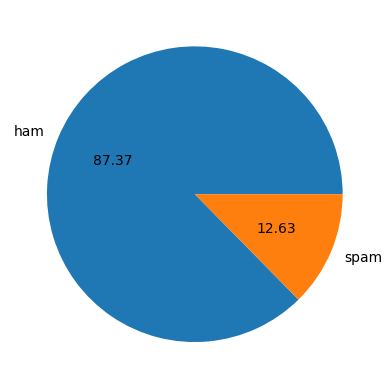

In [17]:
#checking the percentage of ham and spam messages in the form of pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")#autopct shows us percentage
plt.show()

In [18]:
#we can note from the above representation that the data is imbalanced

In [19]:
import nltk #natural language toolkit library

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
#calculating the no of characters in the text
df['num_characters'] = df['text'].apply(len)
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [22]:
df.head(5)
#now we got an extra column which tells us about the number of characters of text of every row

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#finding number of words in the next two code cells
df['text'].apply(lambda x:nltk.word_tokenize(x))#with this function of nltk we break each and every word into a list

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [24]:
df['num_words'] = df['text'].apply((lambda x:len(nltk.word_tokenize(x))))
#counting the no of words by simply adding the len function

In [25]:
df.head()
#creating a new column that stores the number of words

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#finding number of sentences in the next two code cells
df['text'].apply(lambda x:nltk.sent_tokenize(x))#with this function of nltk we break each and every sentence into a list

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [27]:
df['num_sentences'] = df['text'].apply((lambda x:len(nltk.sent_tokenize(x))))
#counting the no of sentences by simply adding the len function

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
#describing only for ham messages

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
#describing only for spam messages

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

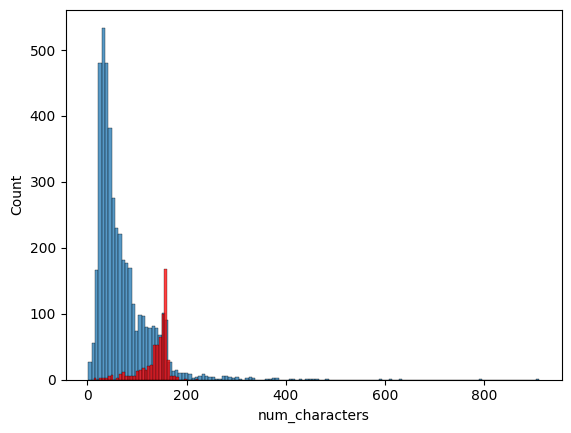

In [33]:
#plotting a histogram for number of characters in ham and spam messages
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

In [34]:
"""
by the above representation we can say that the number of characters used in ham messages
is less than the number of characters used in spam messages
"""

'\nby the above representation we can say that the number of characters used in ham messages\nis less than the number of characters used in spam messages\n'

<Axes: xlabel='num_words', ylabel='Count'>

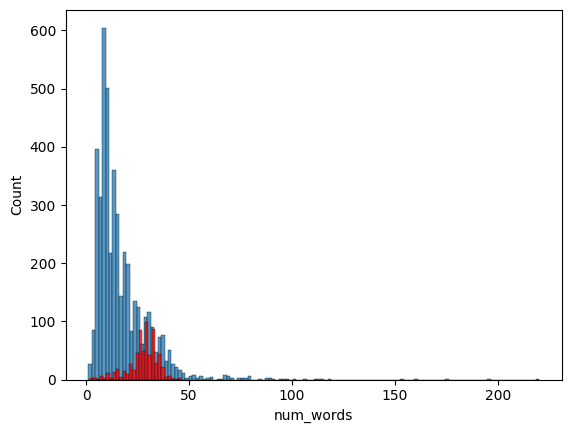

In [35]:
#plotting a histogram for number of words in ham and spam messages
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

In [36]:
#similar trend is followed in the no of words too
"""
we can see that ham messages have less words than spam messages
"""

'\nwe can see that ham messages have less words than spam messages\n'

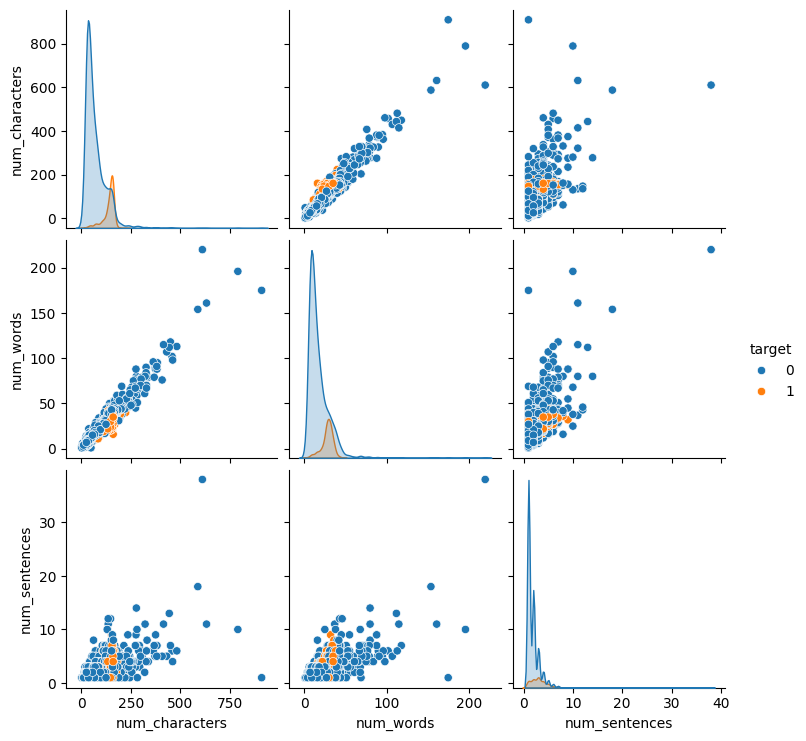

In [37]:
sns.pairplot(df, hue='target')

<ipython-input-38-5ecbdc4b7fcb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

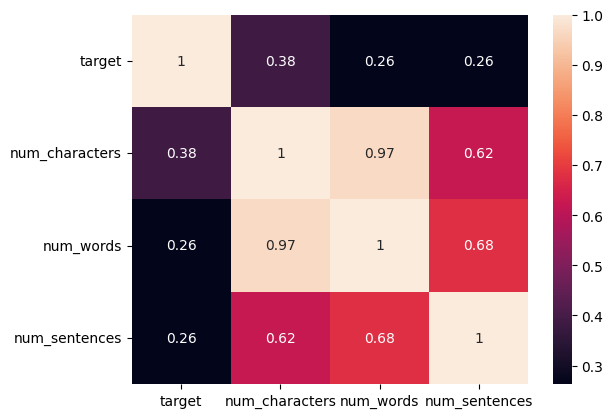

In [38]:
#finding correlation between features using heatmap
sns.heatmap(df.corr(), annot=True)

In [39]:
#we will take the num_characters column for model training as it correlates good enough

#TEXT PREROCESSING
1. Lower Case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
#knowing what are stopwords
from nltk.corpus import stopwords
stopwords.words('english')
#it gives us a list of stopwords in english language
#these are the words that do not add to the meaning of the sentence, they are just there to finish the sentence

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
#for removing punctuation marks we have to import the string library
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
#we will create a function which will perform all the operations together
def transform_text(text):
  text = text.lower() #converting into lower case
  text = nltk.word_tokenize(text) #separating the words

  y = []
  for i in text:
    if i.isalnum():
#this means that we start a for loop and look for numbers in the text and if there is a number then we create an empty list and append in it
#we also removed special characters
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [45]:
#now we do stemming
"""stemming means to convert all the repeated words in the sentence like
danced, dancing, dance to a single word that is dance because they all mean the same.
"""

'stemming means to convert all the repeated words in the sentence like\ndanced, dancing, dance to a single word that is dance because they all mean the same.\n'

In [46]:
ps.stem('dancing') #we stemmed the word to dance
#the e in dance is removed bacause they are a part of nltk

'danc'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text) #applying the function to the text in the dataset

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
#importing wordcloud which highlights the important words
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
#storing all the important words in spam messages in a word cloud

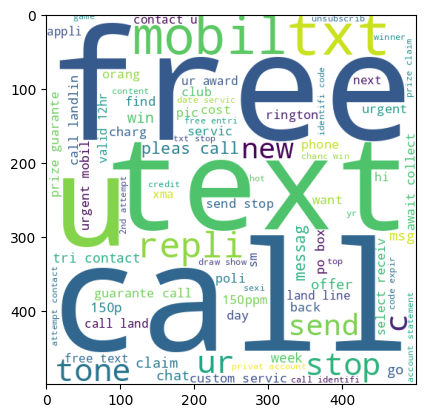

In [51]:
plt.imshow(spam_wc)

In [52]:
#as you can see all these messages are a part of a spam text

In [53]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
#storing all the important words in ham messages in a word cloud

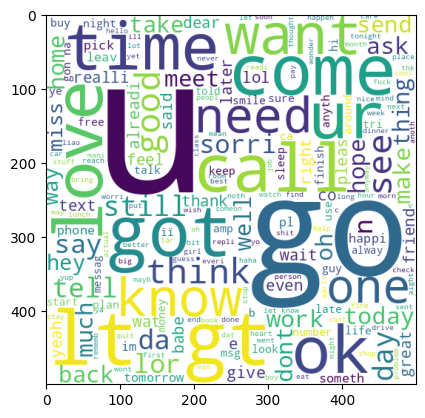

In [54]:
plt.imshow(ham_wc)

In [55]:
#as you can see all these messages are a part of a ham text

In [56]:
#we need to count the top words used in spam messages
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist(): #converting the text to a list
    for word in msg.split():
      spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

In [58]:
from collections import Counter
Counter(spam_corpus).most_common(30) #it takes out the most used 30 words in the text of spam

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [59]:
#doing the same thing for ham messages
#checking the most used words
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist(): #converting the text to a list
    for word in msg.split():
      ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

In [61]:
from collections import Counter
Counter(ham_corpus).most_common(30) #it takes out the most used 30 words in the text of spam

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

#MODEL BUILDING
we will be using naive bayes because it is considered that naive bayes works very well on textual data

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#CountVectorizer converts a collection of text documents into a numerical representation
"""Term frequency Inverse document frequency (TFIDF) is a
statistical formula to convert text documents into
vectors based on the relevancy of the word
"""

'Term frequency Inverse document frequency (TFIDF) is a\nstatistical formula to convert text documents into\nvectors based on the relevancy of the word\n'

In [63]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape

(5169, 6708)

In [65]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
y = df['target'].values #storing all the target values in y

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
#applying train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
"""Precision is a metric that measures how often a machine
learning model correctly predicts the positive class
"""
"""
Positive class is the class that is related to your objective function.
For example, if you want to classify whether the objects are present or not in a given scenario.
So for all the data samples where objects are present will be considered in the positive class.
"""

'\nPositive class is the class that is related to your objective function.\nFor example, if you want to classify whether the objects are present or not in a given scenario.\nSo for all the data samples where objects are present will be considered in the positive class.\n'

In [72]:
#checking multinomial naive bayes
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
matrix = confusion_matrix(y_test, y_pred2)
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))

Accuracy:  0.9593810444874274
Confusion matrix 
 [[896   0]
 [ 42  96]]
Precision Score:  1.0


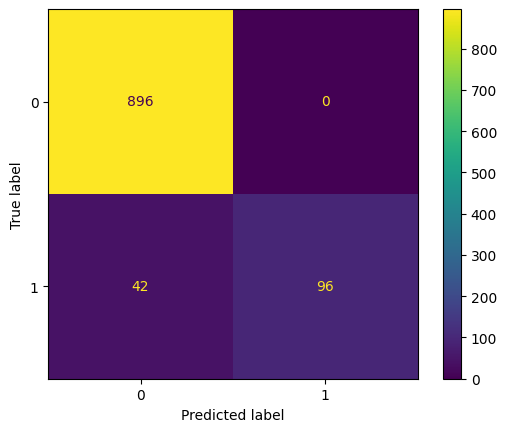

In [73]:
#this is the confusion matrix of multinomial naive bayes
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
disp.plot()

In [74]:
"""as we can see the best accuracy and precision score is of bernoulli naive bayes
but the precision of mulitnomial naive bayes is the best that is it is always correct
so in this case the precision matters more than the accuracy because the data is imbalanced
so we will use the mulitnomial naive bayes.
"""

'as we can see the best accuracy and precision score is of bernoulli naive bayes\nbut the precision of mulitnomial naive bayes is the best that is it is always correct\nso in this case the precision matters more than the accuracy because the data is imbalanced\nso we will use the mulitnomial naive bayes.\n'

In [75]:
"""Accuracy shows how often a classification ML model is correct overall.
Precision shows how often an ML model is correct when predicting the target class
"""

'Accuracy shows how often a classification ML model is correct overall.\nPrecision shows how often an ML model is correct when predicting the target class\n'